In the $5$ by $5$ matrix below, the minimal path sum from the top left to the bottom right, by <b>only moving to the right and down</b>, is indicated in bold red and is equal to $2427$.
$$
\begin{pmatrix}
\color{red}{131} & 673 & 234 & 103 & 18\\
\color{red}{201} & \color{red}{96} & \color{red}{342} & 965 & 150\\
630 & 803 & \color{red}{746} & \color{red}{422} & 111\\
537 & 699 & 497 & \color{red}{121} & 956\\
805 & 732 & 524 & \color{red}{37} & \color{red}{331}
\end{pmatrix}
$$
Find the minimal path sum from the top left to the bottom right by only moving right and down in <a href="resources/documents/0081_matrix.txt">matrix.txt</a> (right click and "Save Link/Target As..."), a 31K text file containing an $80$ by $80$ matrix.

# starting matrix setup
#### this is just putting the cv file into a matrix
---

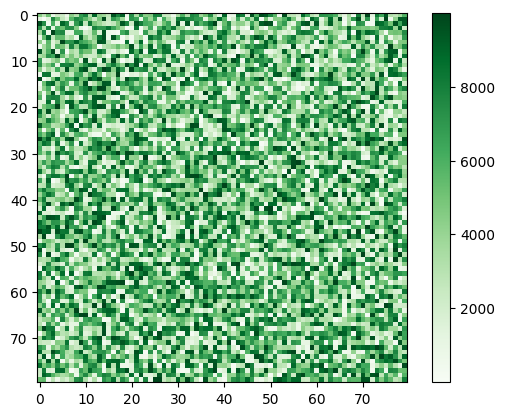

In [34]:
import matplotlib.pyplot as plt
import numpy as np

Map = open("src/matrix.cv","r")
MapString = Map.read()

Matrix =[]

for i in MapString.split("\n"):
   Matrix.append(i.split(","))

for x in range(len(Matrix)):
   for y in range(len(Matrix[x])):
      Matrix[x][y] = int(Matrix[x][y])

Matrix= np.array(Matrix)

plt.imshow(Matrix,cmap ="Greens")
plt.colorbar()

# dijkstra algorithm
---

427337.0


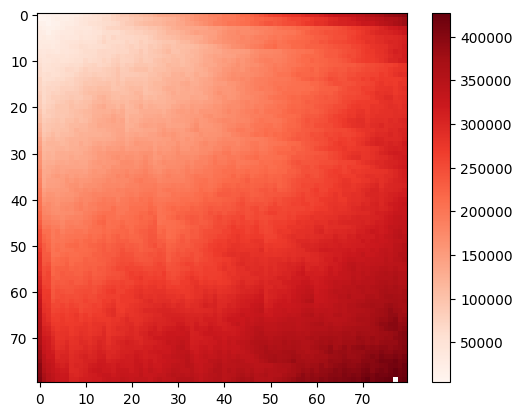

In [ ]:
infinity = float('inf')
moves = [(0,1),(1,0)]
Start = (0,0)
LeastPath = Matrix * infinity
LeastPath[Start] = Matrix[Start]
UnExplored = {Start}
Target = (79,79)

def inBounds(node):
    return node[1] >=0 and node[0] >=0 and node[1] <80 and node[0] <80

while True:
    if  Target in UnExplored:
        UnExploredLeastNode = Target
    else:
        UnExploredLeastPath = infinity
        for node in UnExplored: 
            if UnExploredLeastPath > LeastPath[node]:
                 UnExploredLeastNode = node
                 UnExploredLeastPath =  LeastPath[node]
        if UnExploredLeastPath == infinity:
         break
        
    Position = UnExploredLeastNode
    UnExplored.remove(Position)
    
    ConnectedNodes = np.add(moves,Position)
    #now bound them, in bounds
    ConnectedNodes= filter(inBounds, ConnectedNodes)
    for node in ConnectedNodes:
        node = tuple(node)
        ## this speeds the algorithm by 300/0.5
        if LeastPath[node] == infinity:
            UnExplored.add(node)
        if  LeastPath[node] > LeastPath[Position] + Matrix[node]:
            LeastPath[node] = LeastPath[Position] + Matrix[node]
            

    if Position == Target :
        print(LeastPath[Target])
        break
            
plt.imshow(LeastPath,cmap ="Reds")    
plt.colorbar()       
            

In [73]:
a = {1,2,3,4,5}
a.remove(4)
print(a)

{1, 2, 3, 5}
